In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
movies_3 = pd.read_csv('./movies_3.csv')

In [3]:
del movies_3['Unnamed: 0']
movies_3['year'] = movies_3['year'].fillna(0.0).astype(int)

In [3]:
movies_3

,Unnamed: 0,movieId,title,genres,userId,rating,release_date,year
0,0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,3.5,1995-11-22,1995.0
1,1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,1995-11-22,1995.0
2,2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4,3.0,1995-11-22,1995.0
3,3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1995-11-22,1995.0
4,4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,1995-11-22,1995.0
...,...,...,...,...,...,...,...,...
25000090,25000090,209157,We (2018),Drama,119571,1.5,2018-07-12,2018.0
25000091,25000091,209159,Window of the Soul (2001),Documentary,115835,3.0,2004-06-07,2004.0
25000092,25000092,209163,Bad Poems (2018),Comedy|Drama,6964,4.5,2018-12-27,2018.0
25000093,25000093,209169,A Girl Thing (2001),(no genres listed),119571,3.0,2001-01-20,2001.0


In [2]:
movies = pd.read_csv('./movies.csv')
# ratings = pd.read_csv('./ratings.csv')

In [16]:
movies['year'] = movies['title'].str.extract(pat='\((\d{4})\)')
movies.title = movies.title.str[:-7]
movies

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995
...,...,...,...,...
62418,209157,We,Drama,2018
62419,209159,Window of the Soul,Documentary,2001
62420,209163,Bad Poems,Comedy|Drama,2018
62421,209169,A Girl Thing,(no genres listed),2001


In [17]:
a = movies.drop(['title','genres'], axis =1)
a

,movieId,year
0,1,1995
1,2,1995
2,3,1995
3,4,1995
4,5,1995
...,...,...
62418,209157,2018
62419,209159,2001
62420,209163,2018
62421,209169,2001


In [18]:
b

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62418,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
62419,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
62420,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
62421,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
# df = pd.merge(movies, ratings)
# a = df.drop('genres', axis =1)
b = movies.genres.str.get_dummies(sep='|')
mdf = pd.concat([a,b], axis=1)
mdf

,movieId,year,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1995,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1995,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1995,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,1995,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,1995,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62418,209157,2018,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62419,209159,2001,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
62420,209163,2018,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
62421,209169,2001,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
mdf_n = mdf.dropna(axis = 0)

In [68]:
mdf_r = mdf_n[mdf_n['year'].astype(int) > 1995]
mdf_r

,year,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
60,1996,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
62,1996,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
63,1996,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
64,1996,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65,1996,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62417,2008,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
62418,2018,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
62419,2001,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
62420,2018,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [20]:
del mdf['movieId']

In [69]:
mdf1 = mdf_r.groupby('year').sum()

In [70]:
mdf1

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
year,,,,,,,,,,,,,,,,,,,,
1996,42,95,53,24,40,218,68,43,322,29,1,40,0,10,19,94,48,112,14,6
1997,61,111,59,37,68,237,75,48,350,37,5,45,3,13,27,114,54,124,22,5
1998,59,100,46,34,52,247,88,56,366,37,2,44,3,10,28,140,52,138,25,5
1999,63,99,41,38,59,260,60,51,375,40,0,60,4,6,34,127,47,130,11,7
2000,77,93,41,45,57,295,82,79,441,38,0,68,1,11,34,144,45,137,15,6
2001,78,134,62,44,52,292,82,88,451,53,1,71,3,15,45,156,57,138,26,6
2002,66,151,74,52,64,309,116,88,496,44,0,76,2,18,51,149,73,168,26,4
2003,75,157,71,55,76,320,109,107,480,39,2,78,4,19,48,146,62,177,27,8
2004,76,170,97,53,59,346,90,140,540,70,0,109,3,17,55,173,67,170,35,4


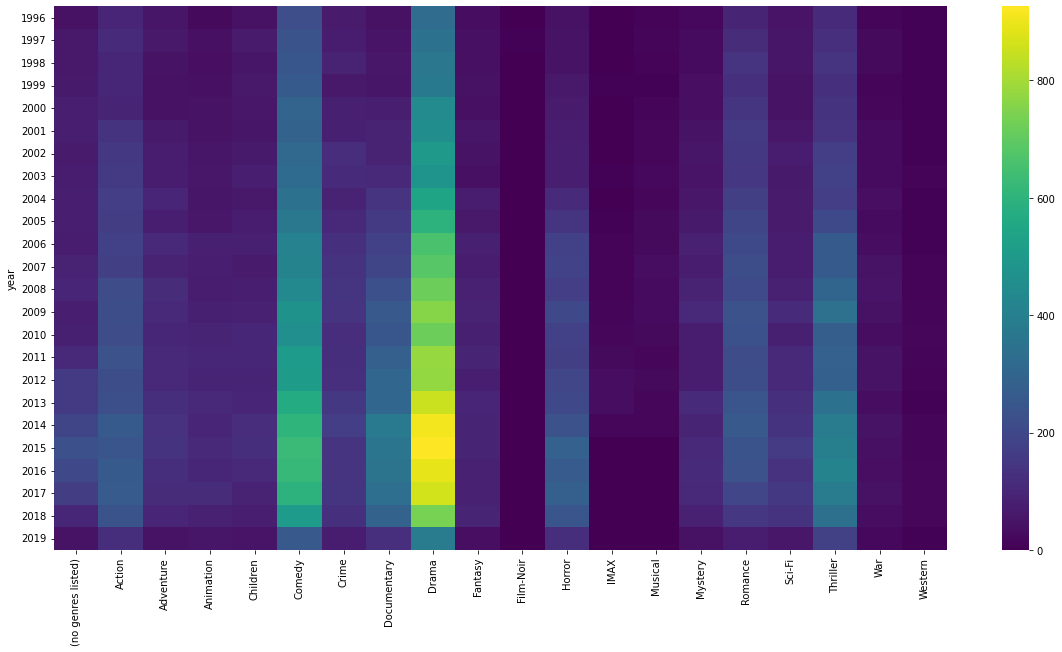

In [109]:
plt.subplots(figsize=(20,10))
# linewidths=.5
# annot=True
ax = sns.heatmap(mdf1,fmt="d", cmap="viridis", annot=False)

In [3]:
movies['year'] = movies['title'].str.split('(')
movies

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Toy Story , 1995)]"
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Jumanji , 1995)]"
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Grumpier Old Men , 1995)]"
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Waiting to Exhale , 1995)]"
4,5,Father of the Bride Part II (1995),Comedy,"[Father of the Bride Part II , 1995)]"
...,...,...,...,...
62418,209157,We (2018),Drama,"[We , 2018)]"
62419,209159,Window of the Soul (2001),Documentary,"[Window of the Soul , 2001)]"
62420,209163,Bad Poems (2018),Comedy|Drama,"[Bad Poems , 2018)]"
62421,209169,A Girl Thing (2001),(no genres listed),"[A Girl Thing , 2001)]"


In [4]:
movies['year'] = movies['title'].str.extract(pat='\((\d{4})\)')
movies.title = movies.title.str[:-7]
movies

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995
...,...,...,...,...
62418,209157,We,Drama,2018
62419,209159,Window of the Soul,Documentary,2001
62420,209163,Bad Poems,Comedy|Drama,2018
62421,209169,A Girl Thing,(no genres listed),2001


In [8]:
movie_gen1 = pd.DataFrame(movies.genres.str.split('|').tolist()).stack().unique()
movie_gen1

array(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Mystery', 'Sci-Fi', 'IMAX', 'Documentary', 'War', 'Musical',
       'Western', 'Film-Noir', '(no genres listed)'], dtype=object)

In [9]:
movies_gen = movies['genres'].str.split('|', expand = True)

movies_gen = movies_gen.rename(columns={0:'genres0',1:'genres1',2:'genres2',3:'genres3',4:'genres4',5:'genres5',6:'genres6',7:'genres7',
                          8:'genres8',9:'genres9'})
movies_gen

,genres0,genres1,genres2,genres3,genres4,genres5,genres6,genres7,genres8,genres9
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,Comedy,Romance,None,None,None,None,None,None,None,None
3,Comedy,Drama,Romance,None,None,None,None,None,None,None
4,Comedy,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
62418,Drama,None,None,None,None,None,None,None,None,None
62419,Documentary,None,None,None,None,None,None,None,None,None
62420,Comedy,Drama,None,None,None,None,None,None,None,None
62421,(no genres listed),None,None,None,None,None,None,None,None,None


In [10]:
# movies['genres'] = movies['genres'].str.split('|')
movie_m_gen = movies.merge(movies_gen,left_index=True,right_index=True)

In [11]:
del movie_m_gen['genres']
movie_m_gen

,movieId,title,year,genres0,genres1,genres2,genres3,genres4,genres5,genres6,genres7,genres8,genres9
0,1,Toy Story,1995,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,2,Jumanji,1995,Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,3,Grumpier Old Men,1995,Comedy,Romance,None,None,None,None,None,None,None,None
3,4,Waiting to Exhale,1995,Comedy,Drama,Romance,None,None,None,None,None,None,None
4,5,Father of the Bride Part II,1995,Comedy,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62418,209157,We,2018,Drama,None,None,None,None,None,None,None,None,None
62419,209159,Window of the Soul,2001,Documentary,None,None,None,None,None,None,None,None,None
62420,209163,Bad Poems,2018,Comedy,Drama,None,None,None,None,None,None,None,None
62421,209169,A Girl Thing,2001,(no genres listed),None,None,None,None,None,None,None,None,None


In [12]:
movie_m_gen.groupby(['year'])['genres0','genres1']

C:\Users\Student\AppData\Local\Temp\ipykernel_8176\172135976.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  movie_m_gen.groupby(['year'])['genres0','genres1']


In [13]:
movies.groupby(['year']).count()['title'].reset_index(name='count')

,year,count
0,1874,1
1,1878,1
2,1880,1
3,1883,1
4,1887,1
...,...,...
130,2015,2513
131,2016,2488
132,2017,2374
133,2018,2034


In [5]:
q =movies.groupby(['year']).count()['title'].reset_index(name='count')

In [6]:
q

,year,count
0,1874,1
1,1878,1
2,1880,1
3,1883,1
4,1887,1
...,...,...
130,2015,2513
131,2016,2488
132,2017,2374
133,2018,2034


ValueError: The number of FixedLocator locations (20), usually from a call to set_ticks, does not match the number of ticklabels (135).

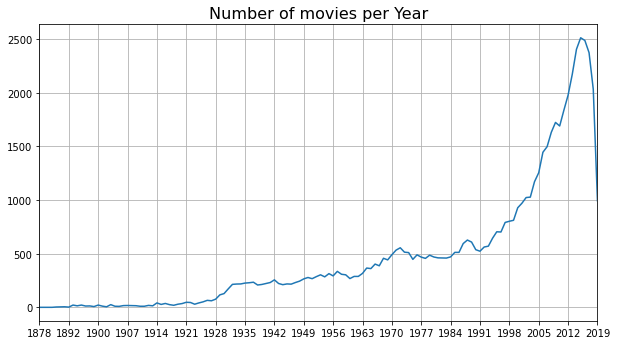

In [27]:
# :year_p = ['1874','1900','1950','2000','2019']
plt.subplots(figsize=(10,12))
plt.subplot(211)
# plt.plot(movies.groupby(['year']).count()['title'])
plt.plot(q['year'],q['count'])
plt.title('Number of movies per Year',fontsize=16)
plt.grid(True)
plt.xlim("2000", "2019")
plt.xticks(q['year'].iloc[1::7],q['year'])
# plt.xticks('1995',q['year'])
plt.show()

In [42]:
movies

,movieId,title,genres
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji,Adventure|Children|Fantasy
2,3,Grumpier Old Men,Comedy|Romance
3,4,Waiting to Exhale,Comedy|Drama|Romance
4,5,Father of the Bride Part II,Comedy
...,...,...,...
62418,209157,We,Drama
62419,209159,Window of the Soul,Documentary
62420,209163,Bad Poems,Comedy|Drama
62421,209169,A Girl Thing,(no genres listed)


In [32]:
movies_3['title'] = movies_3.title.str[:-7]
movies_3

,movieId,title,genres,userId,rating,release_date,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,2,3.5,1995-11-22,1995
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,3,4.0,1995-11-22,1995
2,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,4,3.0,1995-11-22,1995
3,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1995-11-22,1995
4,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,8,4.0,1995-11-22,1995
...,...,...,...,...,...,...,...
25000090,209157,We,Drama,119571,1.5,2018-07-12,2018
25000091,209159,Window of the Soul,Documentary,115835,3.0,2004-06-07,2004
25000092,209163,Bad Poems,Comedy|Drama,6964,4.5,2018-12-27,2018
25000093,209169,A Girl Thing,(no genres listed),119571,3.0,2001-01-20,2001


In [75]:
movies_3.groupby(['year']).count()['title']

year
0       129099
1874        18
1878        22
1881         3
1883        11
         ...  
2019     39738
2020      3523
2021      1364
2022      1826
2024         3
Name: title, Length: 139, dtype: int64